In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt


In [2]:
mca=pd.read_csv('https://raw.githubusercontent.com/apratim777/apratim777/master/Position_Salaries.csv')
mca


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


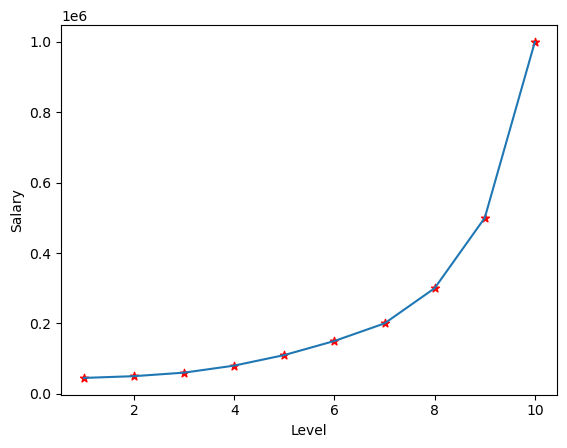

In [11]:
plt.xlabel('Level')
plt.ylabel('Salary')
plt.scatter(mca.Level,mca.Salary,color='red',marker='*')
plt.plot(mca.Level,mca.Salary)



In [34]:
new_y=mca.drop(['Position','Level'],axis=1)
new_y

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


In [19]:
new_x=mca.drop(['Position','Salary'],axis=1)
new_x

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [21]:
reg=linear_model.LinearRegression()
reg.fit(new_x,new_y)

LinearRegression()

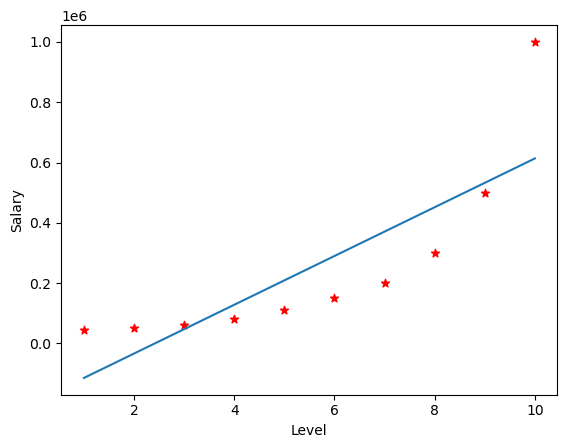

In [22]:
plt.xlabel('Level')
plt.ylabel('Salary')

plt.scatter(mca.Level,mca.Salary,color='red',marker='*')

plt.plot(new_x,reg.predict(new_x))

In [23]:
x=mca.iloc[:,0].values
x


array(['Business Analyst', 'Junior Consultant', 'Senior Consultant',
       'Manager', 'Country Manager', 'Region Manager', 'Partner',
       'Senior Partner', 'C-level', 'CEO'], dtype=object)

In [24]:
y=mca.iloc[:,1].values
y


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [25]:
y1=mca.iloc[:,2].values
y1


array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [26]:
from sklearn .preprocessing import PolynomialFeatures
x


array(['Business Analyst', 'Junior Consultant', 'Senior Consultant',
       'Manager', 'Country Manager', 'Region Manager', 'Partner',
       'Senior Partner', 'C-level', 'CEO'], dtype=object)

In [27]:
poly=PolynomialFeatures(degree=4)

In [28]:
x_poly=poly.fit_transform(new_x)
x_poly


array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [29]:
lin2=linear_model.LinearRegression()
lin2


LinearRegression()

In [30]:
lin2.fit(x_poly,mca.Salary)

LinearRegression()

In [31]:
lin2.score(x_poly,mca.Salary)

0.9973922891706614

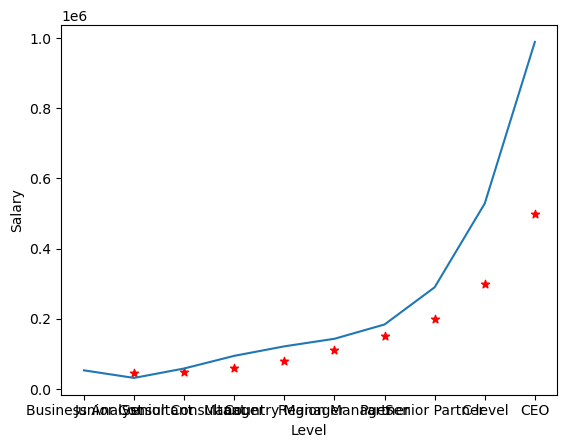

In [32]:
plt.xlabel('Level')
plt.ylabel('Salary')

plt.scatter(mca.Level,mca.Salary,color='red',marker='*')

plt.plot(x,lin2.predict(x_poly))


In [33]:
lin2.predict(x_poly)

array([ 53356.64335681,  31759.90675996,  58642.19114221,  94632.86713289,
       121724.94172498, 143275.05827508, 184003.49650349, 289994.17249411,
       528694.63869452, 988916.08391594])